In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

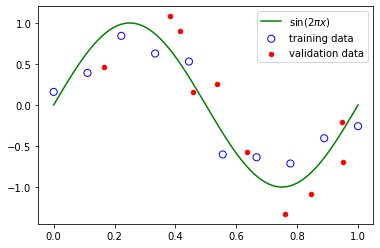

In [3]:
def create_toy_data(func, sample_size, std, rand = False):
    if rand:
      x = np.random.random((1, sample_size))[0]
    else:
      x = np.linspace(0, 1, sample_size).T
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_val, y_val = create_toy_data(func, 10, 0.25, True)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

1. sample thêm 10 điểm dữ liệu cho tập valdiation
2. fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.

In [4]:
class LinearRegression:
  def train(self, X, y):
    self.X = np.c_[X, np.ones(X.shape[0])]
    inv_mat = np.linalg.inv(np.dot(self.X.T, self.X))
    self.coef = np.dot(np.dot(inv_mat, self.X.T), y)
  def fit(self, X=None):
    if X is not None:
      return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef)
    return np.dot(self.X, self.coef)
  def mse(self, fitted, y):
    return np.power(fitted-y,2).sum()/y.shape[0]

class RidgeRegression:
  def __init__(self, alpha):
    self.alpha = alpha
  def train(self, X, y):
    self.X = np.c_[X, np.ones(X.shape[0])]
    inv_mat = np.linalg.inv(np.dot(self.X.T, self.X) + self.alpha*np.identity(X.shape[0]))
    self.coef = np.dot(np.dot(inv_mat, self.X.T), y)
  def fit(self, X=None):
    if X is not None:
      return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef)
    return np.dot(self.X, self.coef)
  def mse(self, fitted, y):
    return np.power(fitted-y,2).sum()/y.shape[0]

def poly(X, deg):
  if deg == 1:
    return X
  if len(X.shape) == 1:
    return poly(np.column_stack((X, np.power(X, deg))), deg-1)
  return poly(np.column_stack((X, np.power(X[:,0], deg))), deg-1)

Train loss: 0.498782370713381
Val loss: 0.14477290971483683


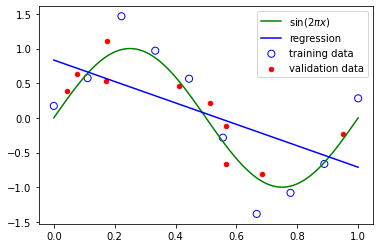

In [ ]:
x = LinearRegression()
x.train(x_train, y_train)
fitted = x.fit(x_test)

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(x_val), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

Train loss: 0.0548516843165745
Val loss: 0.08399504588206569


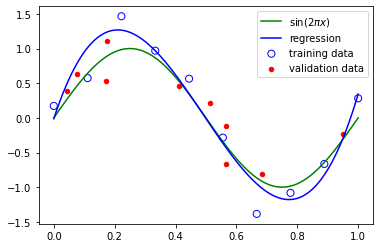

In [ ]:
x = LinearRegression()
x.train(poly(x_train, 3), y_train)
fitted = x.fit(poly(x_test, 3))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(poly(x_val, 3)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

Train loss: 1.884597655665792e-08
Val loss: 0.3722964347899319


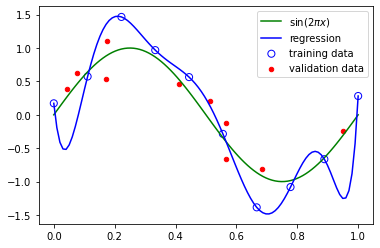

In [ ]:
x = LinearRegression()
x.train(poly(x_train, 9), y_train)
fitted = x.fit(poly(x_test, 9))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(poly(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

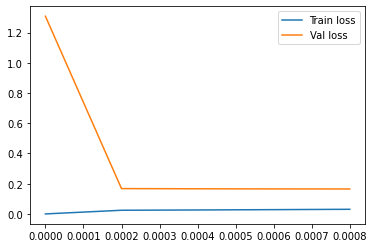

In [27]:
train_loss = {}
val_loss = {}

for a in np.arange(0, 0.001, 0.0002):
  x = RidgeRegression(a)
  x.train(poly(x_train, 9), y_train)
  fitted = x.fit(poly(x_test, 9))

  train_loss[a] = x.mse(x.fit(), y_train), 
  val_loss[a] = x.mse(x.fit(poly(x_val, 9)), y_val)

plt.plot(list(train_loss.keys()), list(train_loss.values()), label = 'Train loss')
plt.plot(list(val_loss.keys()), list(val_loss.values()), label = 'Val loss')
plt.legend()

Train loss: 0.024201170735493167
Val loss: 0.167446396094132


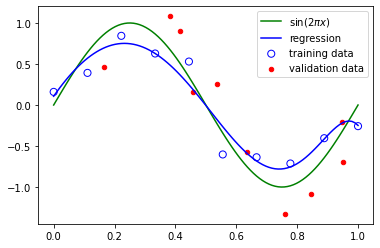

In [24]:
x = RidgeRegression(0.0002)
x.train(poly(x_train, 9), y_train)
fitted = x.fit(poly(x_test, 9))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(poly(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()